# SVC & SVM WITH MARGIN VISUALIZATIONS

----

### IMPORTS

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [92]:
df = pd.read_csv('study_infection.csv')

In [93]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


### Classes are easily splitted - Plot a random hyperplane between both of them (not the optimal based on margins)

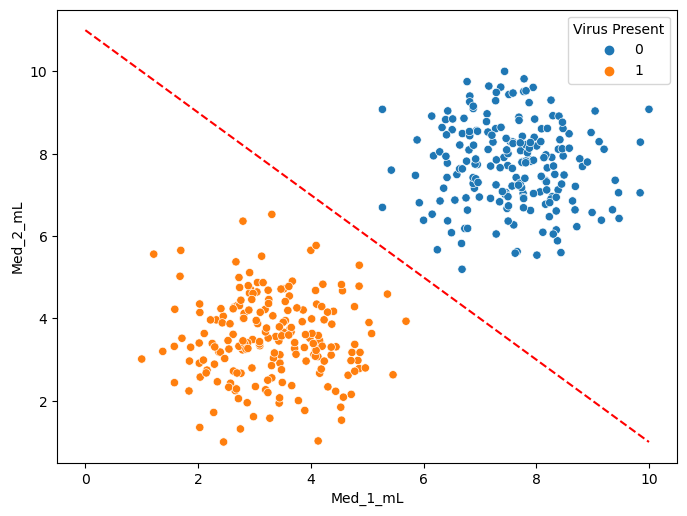

In [94]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)


# HYPERPLANE
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b

plt.plot(x,y,ls='--',color='red')
plt.show()

In [9]:
# Let's check the SVC documentation -- Main hyperparameters: C, kernel, degree & gamma
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### SPLIT X & y datasets (should be splitting in train-test as well, but this is an example oriented to visualization only)

In [95]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [96]:
X.shape

(400, 2)

In [97]:
y.shape

(400,)

### MODEL 1: SVC - Linear kernel, high C value

In [98]:
# MODEL 1: SVC w/linear kernel and extreme C hyperparamter (not accepting values inside the margins)
model = SVC(kernel='linear', C=1000)

In [99]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

### BUILDING PLOT FUNCTION 

In [100]:
def margins_plot(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='coolwarm')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


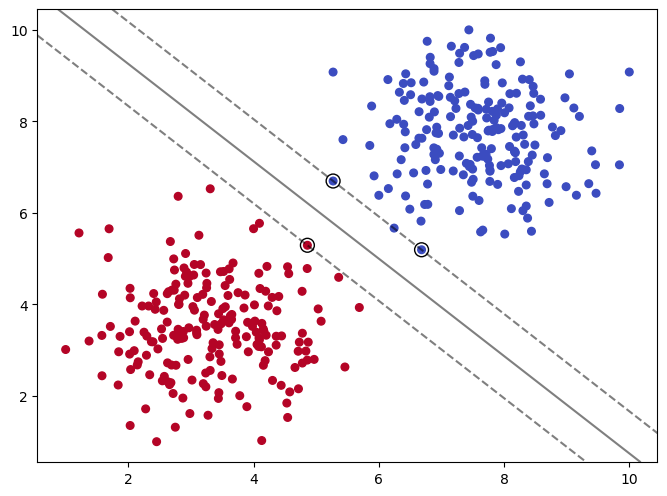

In [102]:
# Plot first model - linear, extreme value for C.
plt.figure(figsize=(8,6), dpi=100)
margins_plot(model,X,y)

### MODEL 3: SVC - Linear kernel, small C value

In [109]:
model = SVC(kernel = 'linear', C=0.0005)

In [110]:
model.fit(X,y)

SVC(C=0.0005, kernel='linear')

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


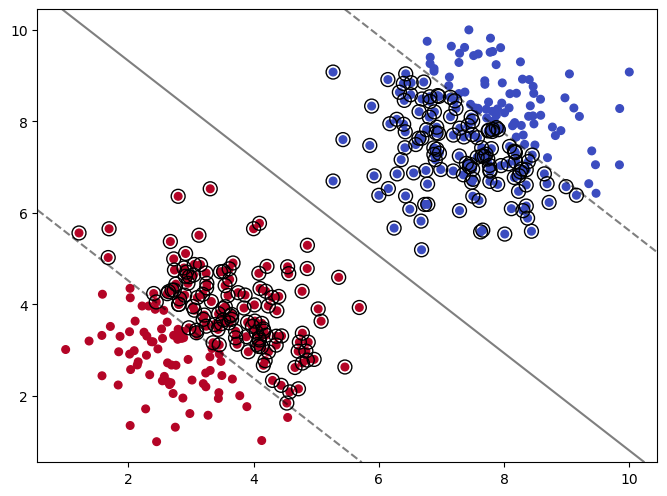

In [111]:
plt.figure(figsize=(8,6), dpi=100)
margins_plot(model, X, y)

Since C hyperparameter value is so low, many point values are allow to be inside the margins


### MODEL 4: Radial Basis Function kernel, C default, gamma default (0.5)

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


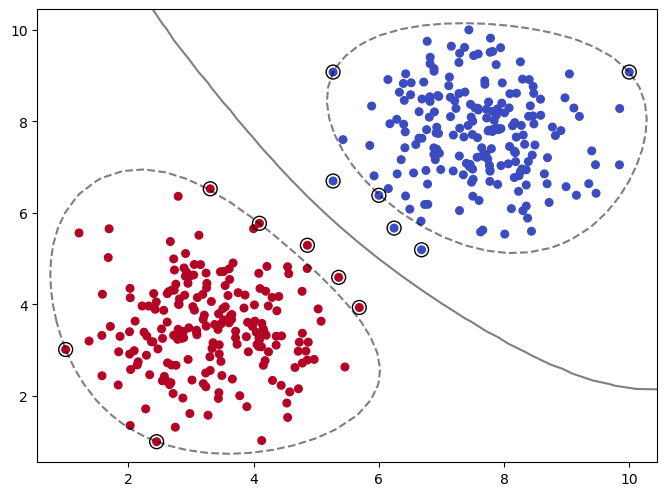

In [113]:
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'rbf', C=1)
model.fit(X,y)
margins_plot(model, X, y)

### MODEL 5: Radial Basis Function kernel, small C value, gamma default (0.5)

More value points allowed inside the margins

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


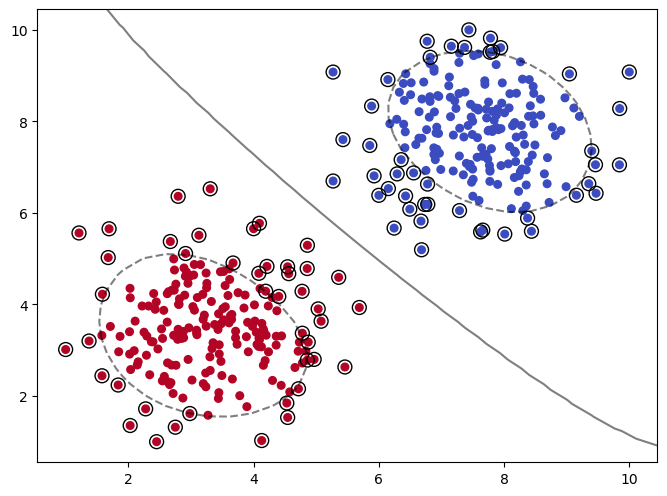

In [114]:
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'rbf', C=0.05)
model.fit(X,y)
margins_plot(model, X, y)

### MODEL 6: Radial Basis Function kernel, high C value, gamma default (0.5)

No value points inside the margins

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


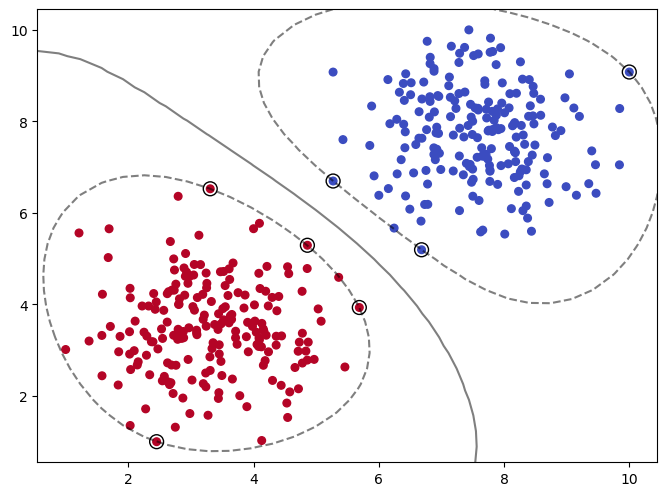

In [115]:
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'rbf', C=10)
model.fit(X,y)
margins_plot(model, X, y)

### MODEL 7: Radial Basis Function kernel, C default, high gamma value

Gamma defines show much influence a single training example has (larger gamma, the closer the other examples have to be in order to be affected) → In this case, it is overfitting

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


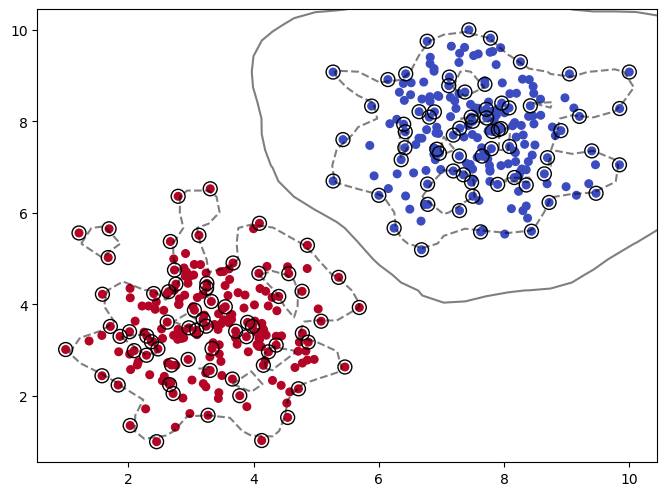

In [116]:
# Higher gamma, turns to overfit the model
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'rbf', C=1, gamma=2)
model.fit(X,y)
margins_plot(model, X, y)

### MODEL 8: Radial Basis Function kernel, C default, gamma scale


/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


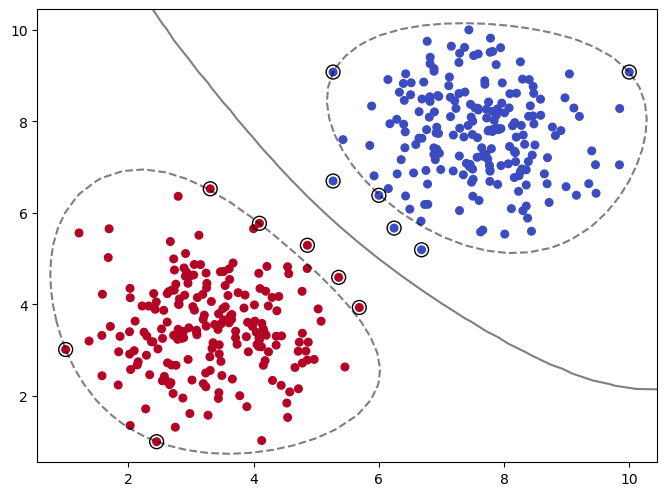

In [117]:
# gamma = scale usually helps on this situation
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'rbf', C=1, gamma='scale')
model.fit(X,y)
margins_plot(model, X, y)

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


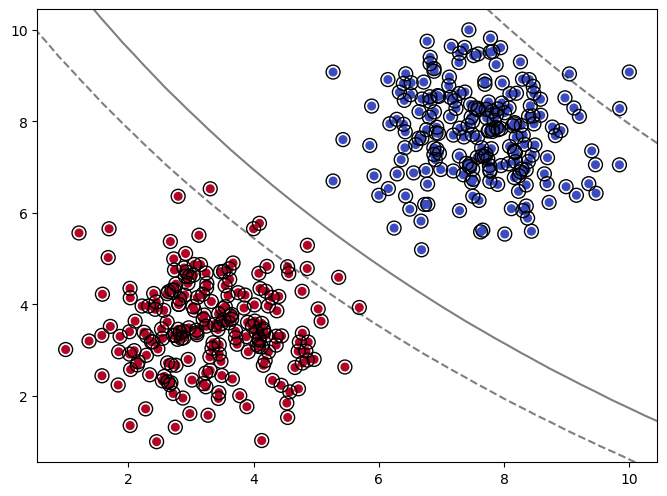

In [119]:
# for kernel = sigmoid --> Does not apply for this example.

plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'sigmoid')
model.fit(X,y)
margins_plot(model,X,y)

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


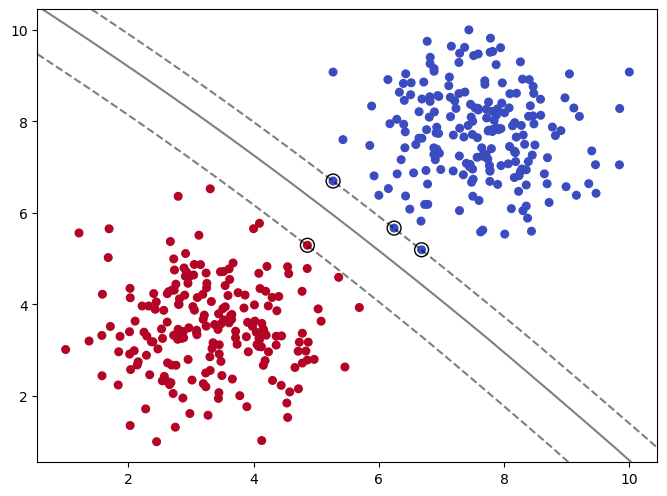

In [120]:
# for kernel = polynomial --> Does not apply for this example. 
## If degree = 1 --> linear kernel
plt.figure(figsize=(8,6), dpi=100)
model = SVC(kernel = 'poly', C=0.05, degree=6)
model.fit(X,y)
margins_plot(model,X,y)

### Running GridSearchCV for SVM, estimate C and kernel hyperparameters.
Should be split into train and test, but for easy understanding of the process, I continued without it.

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],
             'kernel':['linear', 'rbf']}

In [123]:
grid = GridSearchCV(svm, param_grid)

In [124]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [125]:
grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [126]:
grid.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

---